In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [57]:
data = pd.read_csv("housing.csv")

# Data Exploration

In [58]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [60]:
data.dropna(inplace=True)

In [61]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [62]:
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
train_data = X_train.join(y_train)

In [64]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13186,-117.69,34.09,28.0,1437.0,295.0,724.0,262.0,2.7250,INLAND,140200.0
2080,-119.82,36.76,41.0,1973.0,399.0,1107.0,375.0,1.8971,INLAND,66900.0
19241,-122.75,38.54,6.0,6719.0,1016.0,2699.0,997.0,5.4886,<1H OCEAN,254200.0
13836,-117.17,34.51,15.0,5151.0,942.0,2896.0,897.0,3.4875,INLAND,90800.0
3564,-118.56,34.23,36.0,2406.0,432.0,1242.0,454.0,4.6944,<1H OCEAN,221800.0
...,...,...,...,...,...,...,...,...,...,...
15937,-122.40,37.72,47.0,1465.0,306.0,1119.0,315.0,4.2672,NEAR BAY,219400.0
8913,-118.46,34.03,27.0,1965.0,631.0,1042.0,596.0,2.7500,<1H OCEAN,327300.0
15100,-116.95,32.82,18.0,3038.0,592.0,1904.0,595.0,3.8024,<1H OCEAN,144900.0
2446,-119.61,36.56,34.0,1911.0,497.0,1886.0,481.0,1.6250,INLAND,53000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

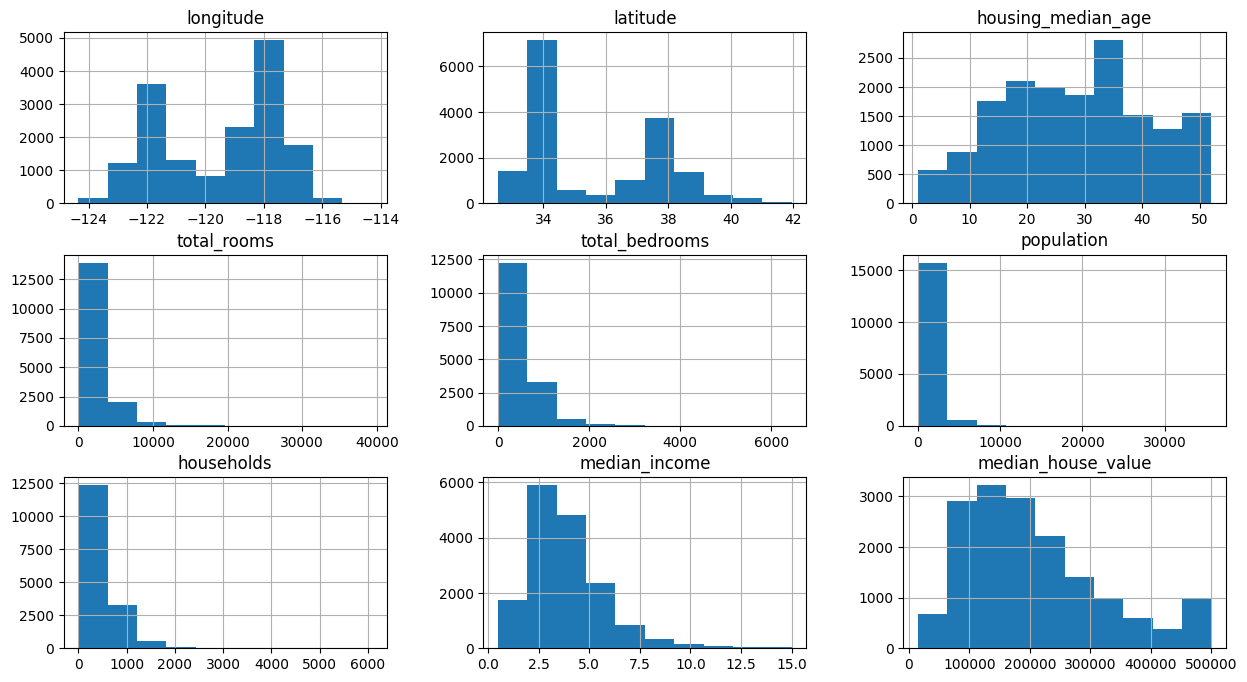

In [65]:
train_data.hist(figsize=(15,8))

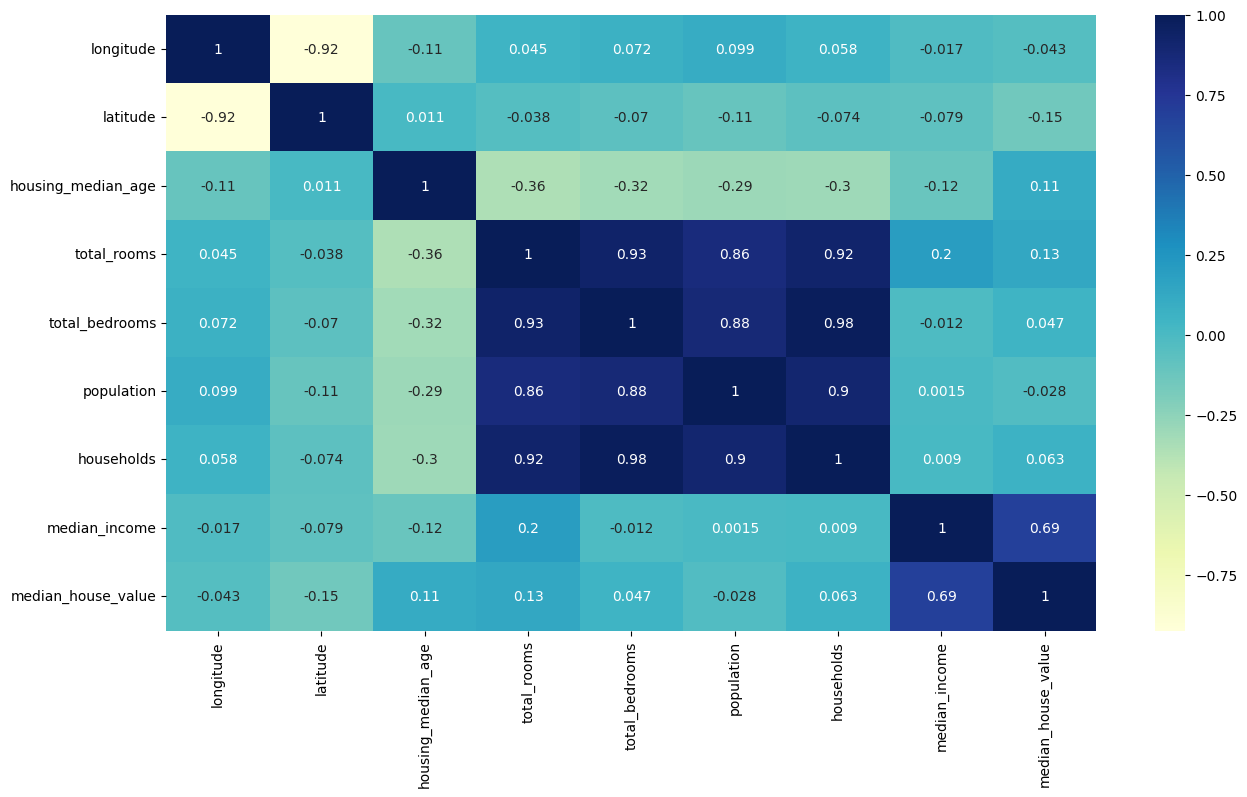

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop("ocean_proximity", axis=1).corr(),annot=True, cmap="YlGnBu")
plt.show()

# Data Preprocessing

In [67]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

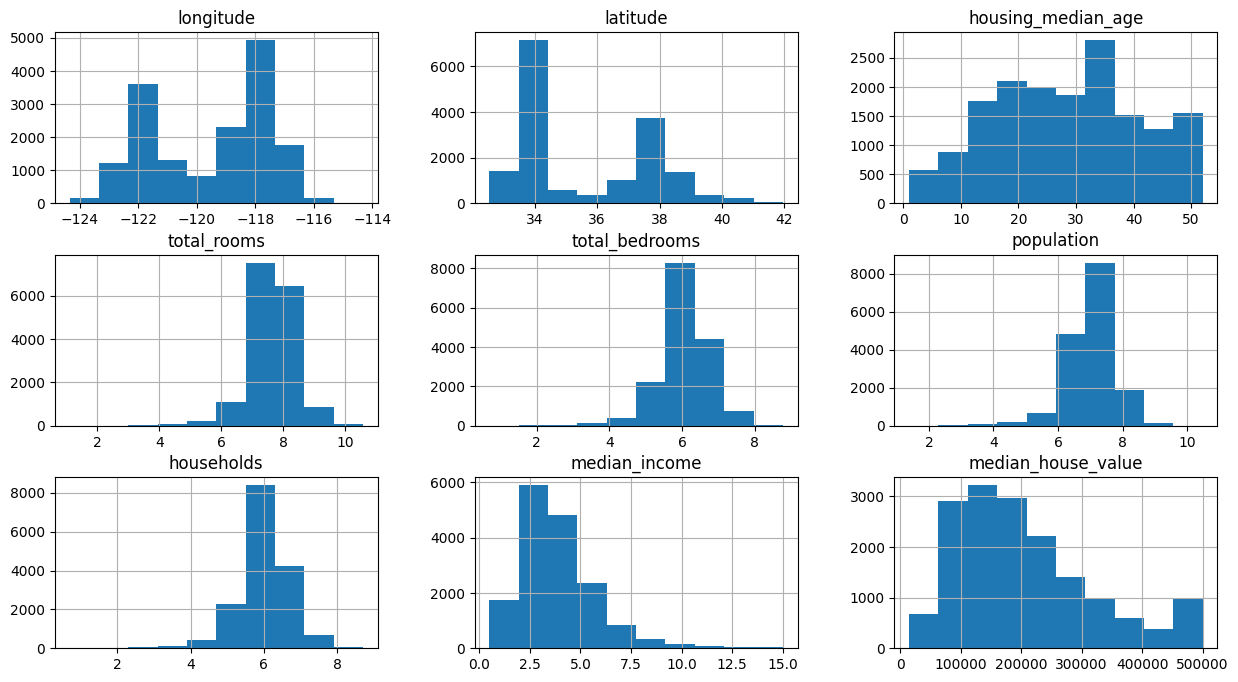

In [68]:
train_data.hist(figsize=(15,8))

In [74]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)


In [75]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13186,-117.69,34.09,28.0,7.271009,5.690359,6.586172,5.572154,2.7250,140200.0,0,1,0,0,0
2080,-119.82,36.76,41.0,7.587817,5.991465,7.010312,5.929589,1.8971,66900.0,0,1,0,0,0
19241,-122.75,38.54,6.0,8.812843,6.924612,7.901007,6.905753,5.4886,254200.0,1,0,0,0,0
13836,-117.17,34.51,15.0,8.547140,6.849066,7.971431,6.800170,3.4875,90800.0,0,1,0,0,0
3564,-118.56,34.23,36.0,7.786136,6.070738,7.125283,6.120297,4.6944,221800.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15937,-122.40,37.72,47.0,7.290293,5.726848,7.021084,5.755742,4.2672,219400.0,0,0,0,1,0
8913,-118.46,34.03,27.0,7.583756,6.448889,6.949856,6.391917,2.7500,327300.0,1,0,0,0,0
15100,-116.95,32.82,18.0,8.019284,6.385194,7.552237,6.390241,3.8024,144900.0,1,0,0,0,0
2446,-119.61,36.56,34.0,7.555905,6.210600,7.542744,6.177944,1.6250,53000.0,0,1,0,0,0


<Axes: >

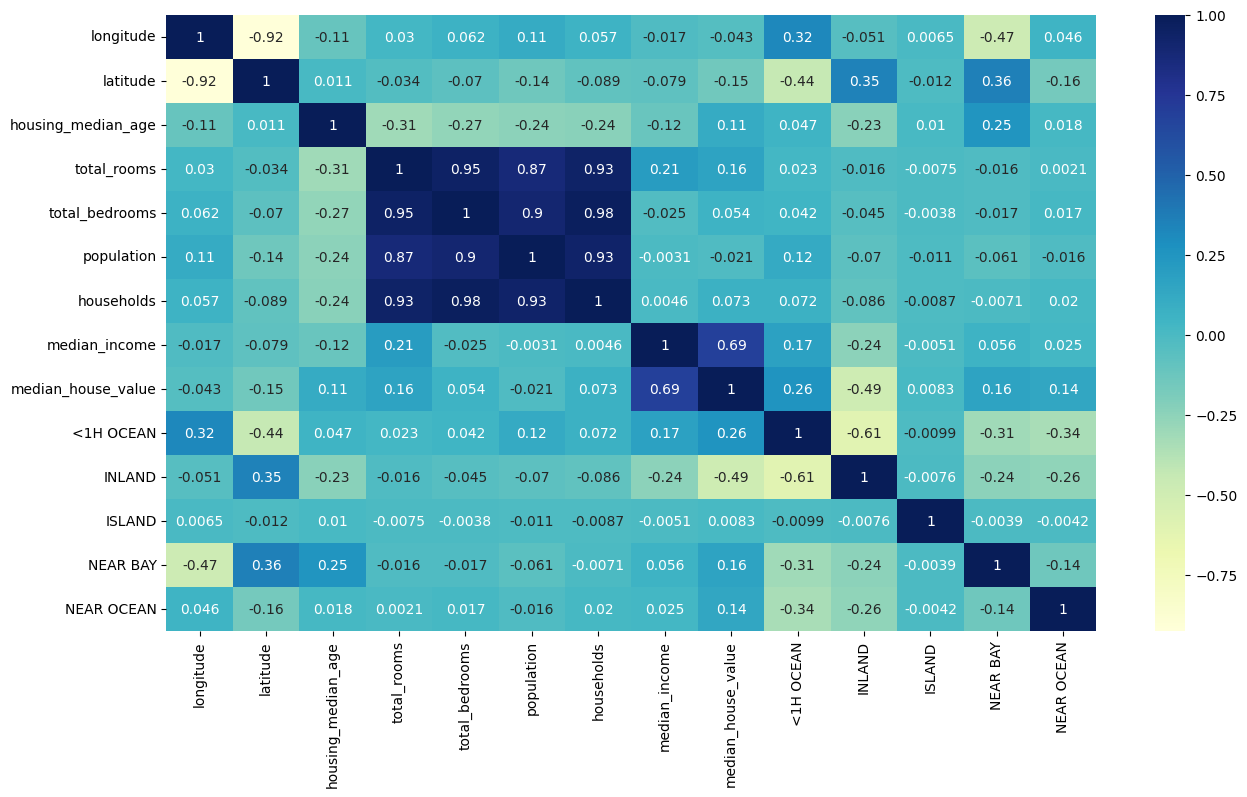

In [76]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

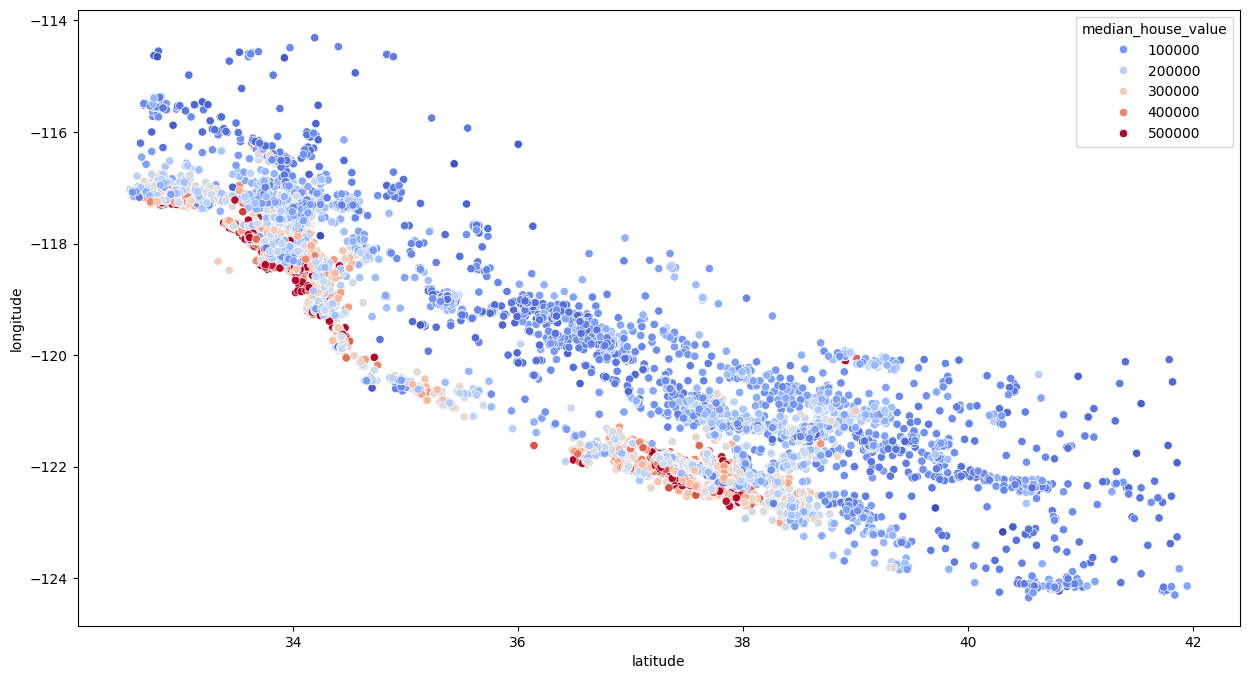

In [81]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")